In [1]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = mne.io.read_raw_brainvision('data/sub-001/sub-001.vhdr')
raw.info

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


In [5]:
print(raw.info.keys())
print(raw.info['ch_names'])

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])
['Fp1', 'F3', 'F7', 'C3', 'P3', 'TP9', 'Fz', 'Cz', 'Fp2', 'F4', 'F8', 'C4', 'P4', 'TP10', 'Pz', 'Oz']


In [6]:
raw.load_data()

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


In [9]:
print(type(raw._data))
print(raw._data.shape)
print(raw.info['sfreq'])

<class 'numpy.ndarray'>
(16, 408640)
500.0


In [11]:
scan_durn = raw._data.shape[1]/raw.info['sfreq']
print("Duration of the EEG recording is ",scan_durn ,"secs , or ", round(scan_durn/60,2),"mins.")

Duration of the EEG recording is  817.28 secs , or  13.62 mins.


selecting only data points from channel 15

In [13]:
raw._data[15:]

array([[-3.00623740e-05, -3.05631481e-05, -3.14957457e-05, ...,
        -1.21160445e-05, -1.18659912e-05, -1.28832751e-05]])

slicing in terms of time : getting data on channel 15 from 1000ms to 1100ms

In [14]:
start_time = int(1.0*raw.info['sfreq'])
stop_time = int(1.1 * raw.info['sfreq'])

chan = 15
raw._data[chan,start_time:stop_time]

array([-3.32371542e-05, -3.56695946e-05, -3.70699693e-05, -3.73843955e-05,
       -3.61347967e-05, -3.37185687e-05, -3.24967218e-05, -3.43886199e-05,
       -3.84356302e-05, -4.12323741e-05, -4.10137920e-05, -3.98413454e-05,
       -4.01963982e-05, -4.22024511e-05, -4.45214044e-05, -4.58859209e-05,
       -4.59046129e-05, -4.50669058e-05, -4.43964731e-05, -4.46733246e-05,
       -4.59191087e-05, -4.77312797e-05, -4.90899788e-05, -4.91470085e-05,
       -4.88116014e-05, -4.93814216e-05, -5.04391412e-05, -5.07022598e-05,
       -5.01242381e-05, -4.98433812e-05, -5.00698787e-05, -5.00764590e-05,
       -4.94547591e-05, -4.80297796e-05, -4.60116151e-05, -4.45004235e-05,
       -4.49821242e-05, -4.72950693e-05, -4.82656232e-05, -4.62170364e-05,
       -4.42591441e-05, -4.39658894e-05, -4.31154984e-05, -4.12371424e-05,
       -3.99026666e-05, -3.87107651e-05, -3.58946616e-05, -3.21113422e-05,
       -3.00001944e-05, -3.01028098e-05])

In [16]:
raw.get_data(picks='Oz',tmin=1.0,tmax=1.1)

array([[-3.32371542e-05, -3.56695946e-05, -3.70699693e-05,
        -3.73843955e-05, -3.61347967e-05, -3.37185687e-05,
        -3.24967218e-05, -3.43886199e-05, -3.84356302e-05,
        -4.12323741e-05, -4.10137920e-05, -3.98413454e-05,
        -4.01963982e-05, -4.22024511e-05, -4.45214044e-05,
        -4.58859209e-05, -4.59046129e-05, -4.50669058e-05,
        -4.43964731e-05, -4.46733246e-05, -4.59191087e-05,
        -4.77312797e-05, -4.90899788e-05, -4.91470085e-05,
        -4.88116014e-05, -4.93814216e-05, -5.04391412e-05,
        -5.07022598e-05, -5.01242381e-05, -4.98433812e-05,
        -5.00698787e-05, -5.00764590e-05, -4.94547591e-05,
        -4.80297796e-05, -4.60116151e-05, -4.45004235e-05,
        -4.49821242e-05, -4.72950693e-05, -4.82656232e-05,
        -4.62170364e-05, -4.42591441e-05, -4.39658894e-05,
        -4.31154984e-05, -4.12371424e-05, -3.99026666e-05,
        -3.87107651e-05, -3.58946616e-05, -3.21113422e-05,
        -3.00001944e-05, -3.01028098e-05]])

plot channel 0z data from 1 sec to 1.1 sec

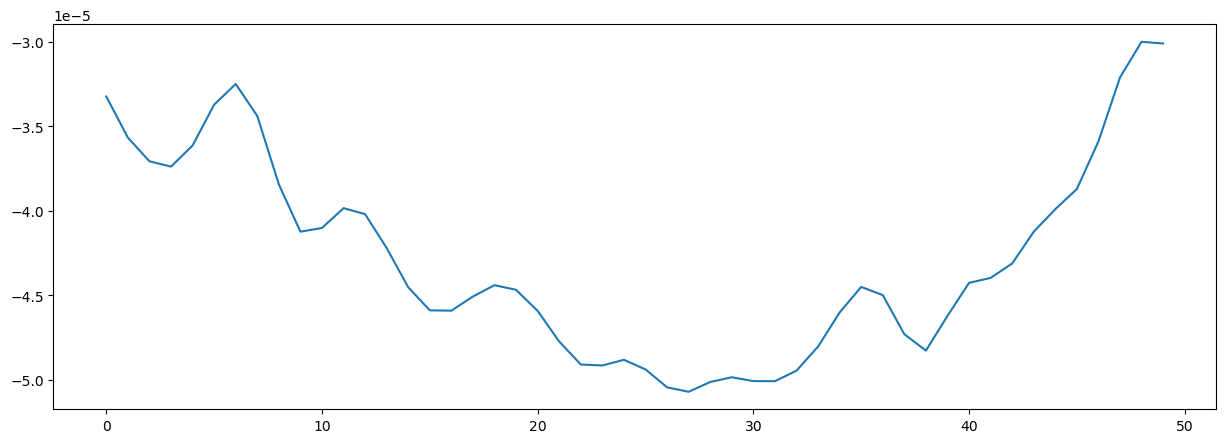

In [18]:
channel = 'Oz'
start_time = 1.0
stop_time = 1.1
fig,ax =plt.subplots(figsize=[15,5])
ax.plot(raw.get_data(picks=channel,tmin=start_time,tmax=stop_time).T)
plt.show()


plotting Oz channel data from 1.0s to 1.1s against time ( and not samples as above)

Text(0, 0.5, 'Voltage(muv)')

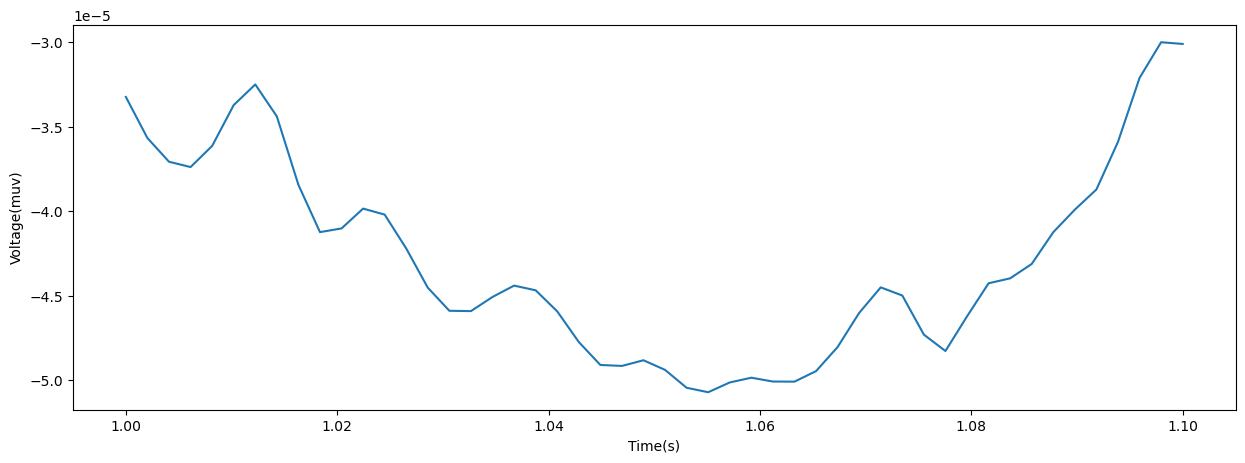

In [21]:
channel='Oz'
start_time=1.0
stop_time=1.1

data = raw.get_data(picks=channel,tmin=start_time,tmax=stop_time).T

#get time values
timevals = np.linspace(start_time,stop_time,num=data.shape[0])

fig,axs = plt.subplots(figsize=[15,5])
axs.plot(timevals,data)

plt.xlabel('Time(s)')
plt.ylabel('Voltage(muv)')


view descriptive statistics for each channel and the range of values in each channel

In [4]:
raw.describe()

<RawBrainVision | sub-001.eeg, 16 x 408640 (817.3 s), ~21 kB, data not loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -285.40     -30.22      -1.43      27.83    1301.03
 1  F3    EEG   µV      -174.79     -17.23       9.22      27.46     253.16
 2  F7    EEG   µV      -218.86     -27.54       1.24      27.61     840.83
 3  C3    EEG   µV      -143.89     -11.69       2.93      14.49     125.35
 4  P3    EEG   µV      -222.93     -16.64       1.79      19.13      98.77
 5  TP9   EEG   µV      -521.95     -24.35      10.94      48.68     507.04
 6  Fz    EEG   µV       -63.42     -10.49      -0.49      12.11      96.25
 7  Cz    EEG   µV      -122.98     -16.84      -0.59      16.92      70.10
 8  Fp2   EEG   µV      -308.07     -34.05       0.94      32.26     455.79
 9  F4    EEG   µV       -88.54     -11.64       3.62      14.80     123.72
10  F8    EEG   µV      -390.29     -19.68      -0.60      14.91     241.88
11  C4   

set the montage to the 10-20 system of easycap system to add location information with the standard eeg location of easycap

In [5]:
raw.set_montage('easycap-M1')

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


viewing the 3d-coordinate data in the digitsed form stored as a set dig objects

In [7]:
raw.info['dig']

[<DigPoint |        LPA : (-86.1, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 86.1, 0.0) mm       : head frame>,
 <DigPoint |        RPA : (86.1, 0.0, 0.0) mm       : head frame>,
 <DigPoint |     EEG #1 : (-29.3, 90.3, 36.8) mm    : head frame>,
 <DigPoint |     EEG #2 : (29.3, 90.3, 36.8) mm     : head frame>,
 <DigPoint |     EEG #3 : (-51.8, 63.9, 87.6) mm    : head frame>,
 <DigPoint |     EEG #4 : (51.8, 63.9, 87.6) mm     : head frame>,
 <DigPoint |     EEG #5 : (-68.3, -0.0, 106.1) mm   : head frame>,
 <DigPoint |     EEG #6 : (68.3, 0.0, 106.1) mm     : head frame>,
 <DigPoint |     EEG #7 : (-51.8, -63.9, 87.6) mm   : head frame>,
 <DigPoint |     EEG #8 : (51.8, -63.9, 87.6) mm    : head frame>,
 <DigPoint |    EEG #11 : (-76.8, 55.8, 36.8) mm    : head frame>,
 <DigPoint |    EEG #12 : (76.8, 55.8, 36.8) mm     : head frame>,
 <DigPoint |    EEG #17 : (0.0, 68.3, 106.1) mm     : head frame>,
 <DigPoint |    EEG #18 : (0.0, 0.0, 135.1) mm      : head fra

view channel and electrode locations using tools from MNE

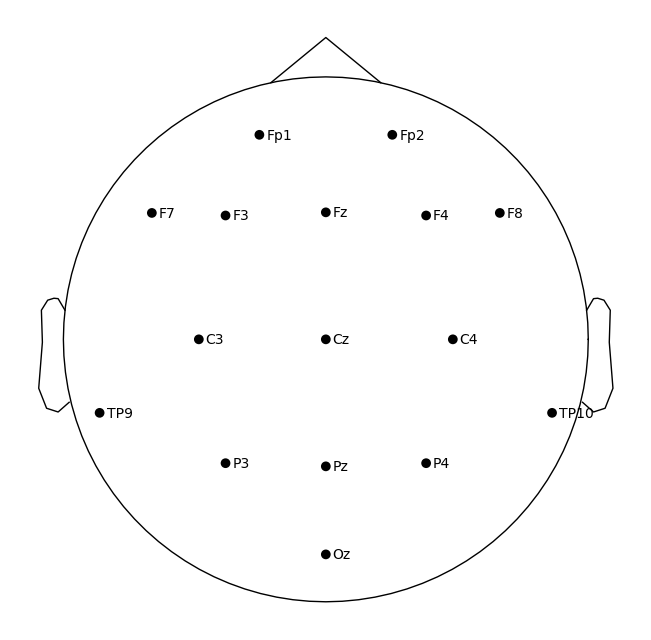

In [8]:
raw.plot_sensors(show_names=True)
plt.show()

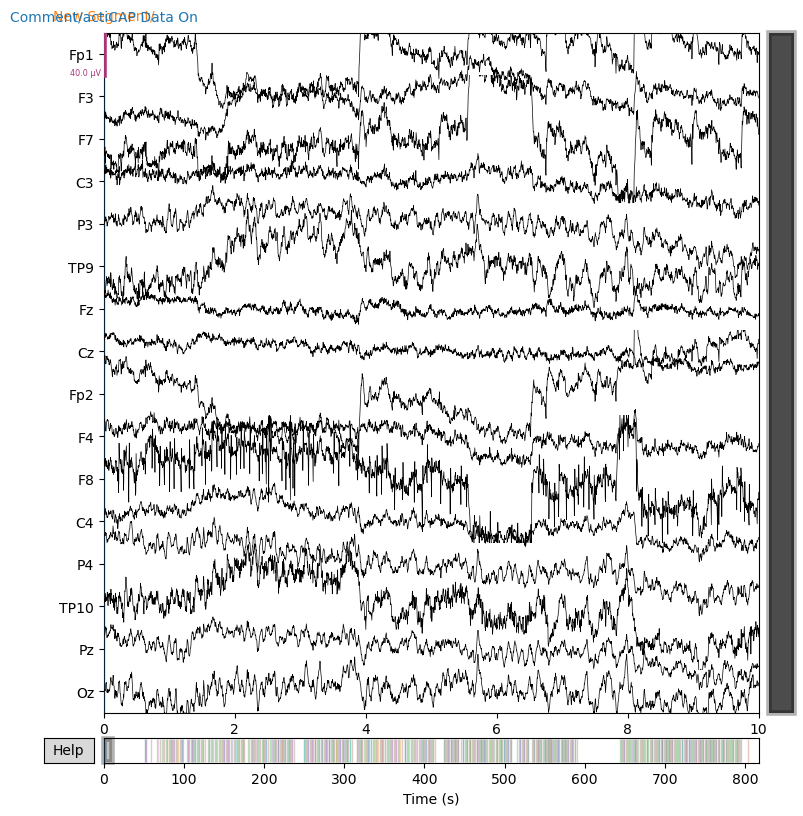

In [10]:
raw.plot()
plt.show()


viewing the event codes of the experiment

In [12]:
mne.events_from_annotations(raw)

(array([[     0,      0,  99999],
        [     0,      0,  10001],
        [ 25550,      0,      5],
        ...,
        [397701,      0,      3],
        [402068,      0,      7],
        [402073,      0,      4]]),
 {'Comment/actiCAP Data On': 10001,
  'New Segment/': 99999,
  'Stimulus/S  1': 1,
  'Stimulus/S  2': 2,
  'Stimulus/S  3': 3,
  'Stimulus/S  4': 4,
  'Stimulus/S  5': 5,
  'Stimulus/S  7': 7,
  'Stimulus/S101': 101,
  'Stimulus/S102': 102,
  'Stimulus/S111': 111,
  'Stimulus/S112': 112,
  'Stimulus/S201': 201,
  'Stimulus/S202': 202,
  'Stimulus/S211': 211,
  'Stimulus/S212': 212})

viewing event codes data in terms of time in milliseconds and not seconds

In [16]:
events,events_dict = mne.events_from_annotations(raw)

events_ms = events.copy()
events_ms[:,0]= events_ms[:,0]/500*1000
events_ms[:]

array([[     0,      0,  99999],
       [     0,      0,  10001],
       [ 51100,      0,      5],
       ...,
       [795402,      0,      3],
       [804136,      0,      7],
       [804146,      0,      4]])

building the mne raw data set

In [18]:
import mne
mne.set_log_level('error')

#participant id
p_id ='sub-001'
data_dir = 'data/' + p_id + '/'

#file path name
raw_file = data_dir + p_id + '.vhdr'

#read raw eeg data
raw = mne.io.read_raw_brainvision(raw_file,preload=True)

#set montage
montage="easycap-M1"
raw.set_montage(montage)





Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,19 points
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


plotting power spectrum density function 

/home/arg/.local/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


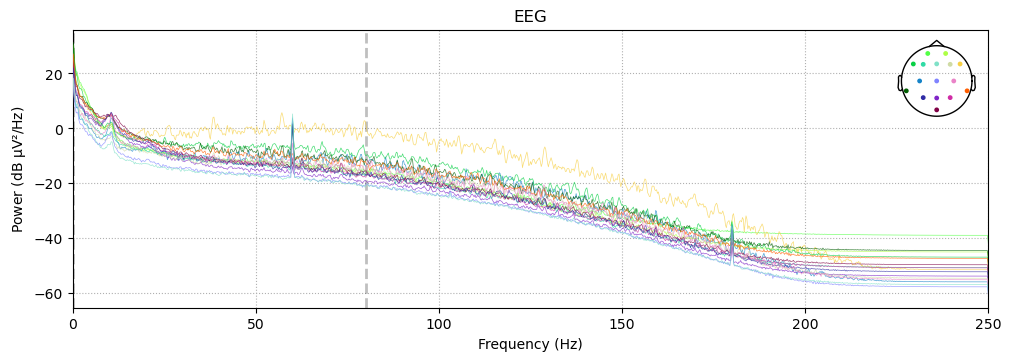

In [19]:
raw.compute_psd().plot()
plt.show()

offline filtering with a high pass filter of frequency 0.1Hz and a low pass filter of 30Hz

/home/arg/.local/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


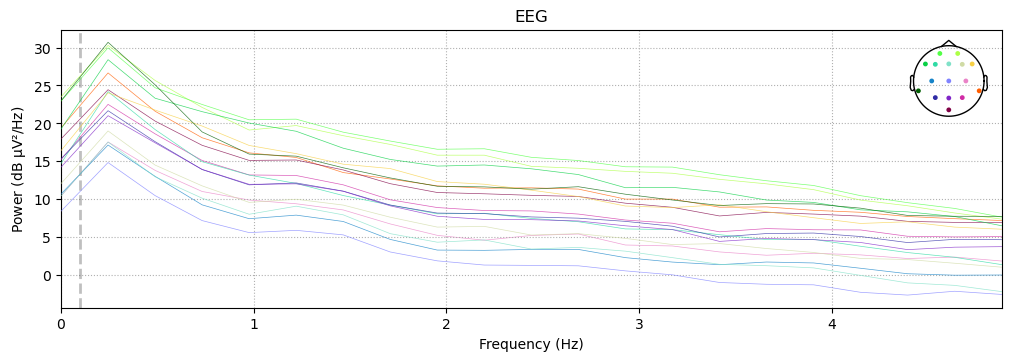

In [26]:
low_cut = 0.1
high_cut = 30
raw_filt= raw.copy().filter(low_cut,high_cut)
raw_filt.compute_psd(fmax=5).plot()
plt.show()

plotting both filtered and unfiltered data to compare the two


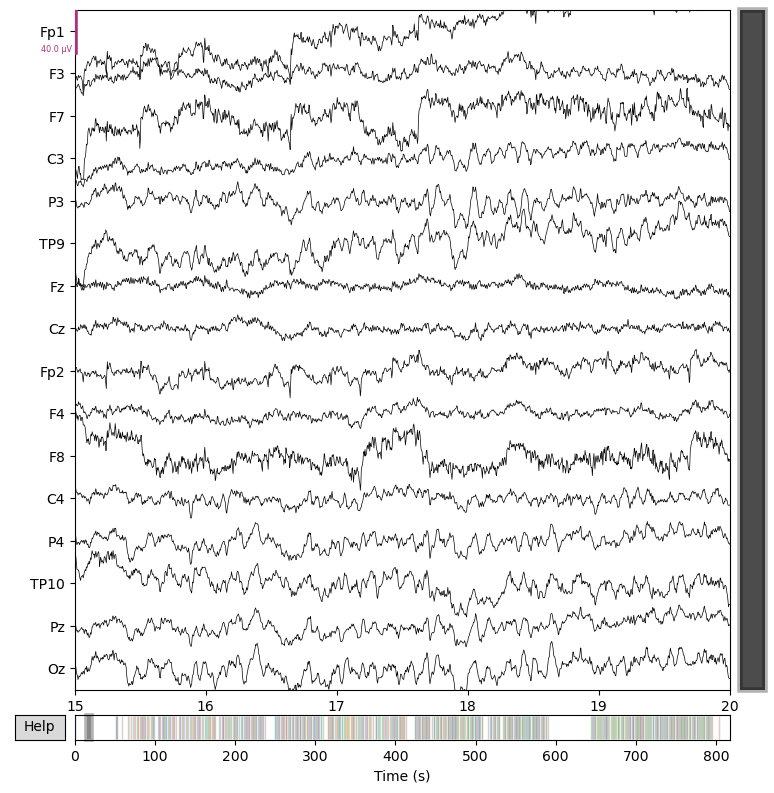

In [28]:
raw.plot(start=15,duration=5)
plt.show()

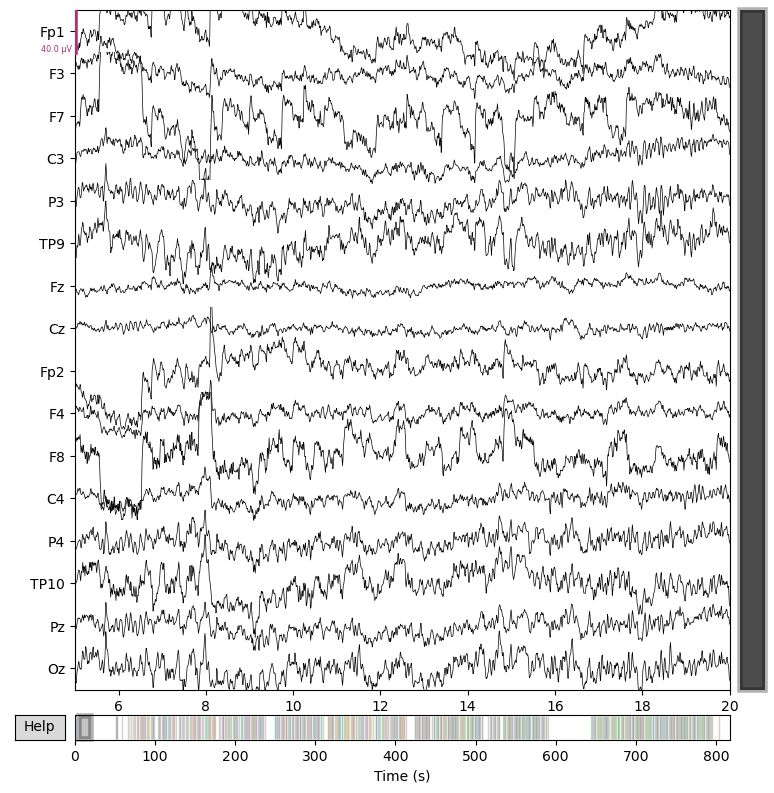

In [29]:
raw_filt.plot(start=5,duration=15)
plt.show()

saving the data for preprocessing down the pipeline rather than running the steps again


In [30]:
raw_filt.save(data_dir + p_id + '-filt-raw-arg.fif',overwrite=True)

saving the raw unfiltered file as well

In [32]:
raw.save(data_dir + p_id + '-raw-arg.fif',overwrite=True)   